In [1]:
import numpy as np
import math
from scipy import integrate
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sm
import scipy.integrate as spi

#### №1 Решить нелинейное уравнение по следующему плану:
##### ◦ Построить график функции. Определить интервалы, в которых находится единственный корень..
##### ◦ Проверить сходимость каждого метода.
##### ◦ В каждом интервале найти корень с точностью до 0.001 пользуясь следующими методами: методом половинного деления, методом хорд, методом последовательных приближений.
##### ◦ Стоп по условию ∣ xn−xn−1∣< ϵ или ∣ f (xn)∣< ϵ
##### ◦ Для каждого метода вывести количество итераций, вывести таблицу итераций(можно оформить с помощью PrettyTable или Pandas).
##### ◦ Проверить найденные решения с помощью метода solve

$$ x^3 - 1,89*x^2 - 2x + 1,76 $$

   right    left  iteration
0  0.000 -2.0000          0
1 -1.000 -2.0000          1
2 -1.000 -1.5000          2
3 -1.000 -1.2500          3
4 -1.125 -1.2500          4
5 -1.125 -1.1875          5
   left     right      f(x)  iteration
0     0  2.000000 -1.130000          0
1     0  0.988764 -1.098625          1
2     0  0.608763  0.067658          2
3     0  0.633100 -0.009987          3
4     0  0.629528  0.001411          4
       right      left  iteration
0   4.000000  2.000000          0
1   3.000000  2.000000          1
2   2.500000  2.000000          2
3   2.500000  2.250000          3
4   2.500000  2.375000          4
5   2.437500  2.375000          5
6   2.437500  2.406250          6
7   2.421875  2.406250          7
8   2.421875  2.414062          8
9   2.417969  2.414062          9
10  2.417969  2.416016         10
11  2.416992  2.416016         11
12  2.416504  2.416016         12


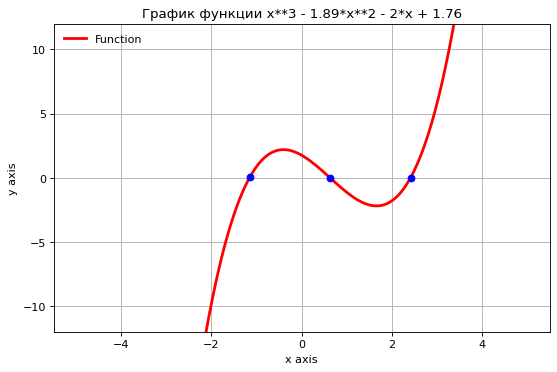

In [2]:
def func(x):
    return x**3 - 1.89*x**2 - 2*x + 1.76

def half_division_method(left, right):
    iterations = 0
    table = [[]]
    table[0] = [right, left, iterations]
    while True:
        middle = (right + left) / 2
        if func(left) * func(middle) < 0:
            right = middle
        elif func(right) * func(middle) < 0:
            left = middle
        if abs(func(middle)) < 0.001:
            break
        iterations += 1
        table.append([right, left, iterations])
    df = pd.DataFrame(table, columns=['right', 'left', 'iteration'])
    print(df)
    return (right + left) / 2

def dxdx_func(x):
    return  6 * x - 1.89 * 2

def khord_method(left, right):
    iterations = 0
    table = [[]]
    table[0] = [left, right, func((right - left) / 2), 0]
    if dxdx_func(left) * func(left) < 0:
        x = right
        while True:
            x_new = x - func(x) / (func(x) - func(left)) * (x - left)
            if abs(func(x_new)) < 0.001:
                x = x_new
                break
            x = x_new
            iterations += 1
            table.append([left, x, func(x), iterations])
    else:
        x = left 
        while True:
            x_new = x - func(x) / (func(right) - func(x)) * (right - x)
            if abs(func(x_new)) < 0.001:
                x = x_new
                break
            x = x_new
            iterations += 1
            table.append([x, right, func(x), iterations])
    df = pd.DataFrame(table, columns=['left', 'right', 'f(x)', 'iteration'])
    print(df)
    return x

fig = plt.figure(figsize=(8, 5), dpi=80); # А как иначе я определю интервалы
X = np.linspace(-5, 5, 256, endpoint=True);
F =  X**3 - 1.89*X**2 - 2*X + 1.76;
plt.plot(X, F, color="red", linewidth=2.5, linestyle="-", label="Function");
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.ylim(-12, 12)
result1 = half_division_method(-2, 0) # метод половинного деления реализован
plt.plot(result1, func(result1), color="blue", marker="o")
result2 = khord_method(0, 2) # метод хорд стоит
plt.plot(result2, func(result2), color="blue", marker="o")
result3 = half_division_method(2, 4) # метод ньютона поставье
plt.plot(result3, func(result3), color="blue", marker="o")
plt.title('График функции x**3 - 1.89*x**2 - 2*x + 1.76')
plt.legend(loc='upper left', frameon=False);
plt.grid();
plt.show();

# print("bin_search")
# x = half_division_method(-4, -3)
# print(f"x={x}, y(x)={func(x)}")